In [2]:
# 데이터 불러오기

import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'
raw = pd.read_csv(file, encoding='cp949')

In [3]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [4]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

In [5]:
'03-23'.split('-')

['03', '23']

In [6]:
# 일자 컬럼에서 월에 해당하는 감ㅅ만 선택하여 월 컬럼을 추가하기
# 시리즈에서 반복문을 통해 하나씩 계산 점검을 진행하는 방식을 이용하기

month_list = []
for monthdate in raw['일자']:
    month = monthdate.split('-')[0]   # [0]의 의미: 쪼개고 첫번쨰 파트로 지정(-의 앞에있는 부분)
    month_list.append(month)
    
raw['월'] = month_list

In [8]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


In [7]:
# 분석할 컬럼만 선택하기

columns_select = ['팀','이름','생일','일자','상대','타수','안타','홈런','루타','타점','볼넷','사구','희비','월']
data = raw[columns_select]

data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


In [8]:
# 피벗테이블 사용해서 월볗 실적 집계
# 결측치는 'fill_value = 0' 써서 0 채우기

data_player_month = data.pivot_table(index = ['팀','이름','생일','월'],
                values = ['일자','상대','타수','안타','홈런','루타','타점','볼넷','사구','희비'],
                aggfunc = 'sum')

data_player_month.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [11]:
data_player_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


In [9]:
# 현재 인덱스로 정리된 팀/이름/생일/월 데이터를 컬럼으로 변경
# 그럼 성수별 월별 제이터 정리 완료

data_player_month = data_player_month.reset_index()

data_player_month.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0


In [10]:
# 타율/출루율/장타율/OPS를 계산하는 함수 만들기
# 데이터 프레임을 입력하면, 해당 데이터 프레임에서 인덱스별 실작을 계산해서 반환
# 타율 : 타격에 성공해서 진루하는 비율      (안타/타수)
# 출루율 : 살아서 진루하는 비율             (안타+볼넷+몸에맞는볼/타수+ㅂ볼넷+몸에맞는볼+희생플라이)
# 장타율 : 타율에 진루한 베이스 가중치 추가 (루타/타수)
# OPS : 출루율+장타율                       (출루율+장타율)

def cal_hit(df):
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷']+df['사구'])/(df['타수'] + df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] / df['장타율']
    
    return df

In [11]:
plyer_month_stat = cal_hit(data_player_month)

plyer_month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.318182,0.277778,1.145455
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.340426,0.386364,0.881101
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.361702,0.378049,0.956760
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.366667,0.358025,1.024138


In [16]:
# 비어있는 데이터 행은 지우기

plyer_month_stat = plyer_month_stat.dropna()

In [14]:
# 월별 출루율 정리하기
# index = ['팀', '이름', '생일'], columns = '월', values= '출루율'

month_pivot = plyer_month_stat.pivot_table(index = ['팀', '이름', '생일'],
                            values = '출루율',
                            columns = '월')
month_pivot.head()

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.318182  0.340426  0.361702  0.366667  0.444444   
    김주찬 1981-03-25  0.272727  0.236364  0.352941  0.329114  0.431818   
    나지완 1985-05-19  0.333333  0.343750  0.200000  0.410256  0.071429   
    류승현 1997-07-01  0.000000  0.375000  0.310345  0.280702       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.320000  0.386364 NaN  
    김주찬 1981-03-25  0.390244  0.333333 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.277778 NaN  
    문경찬 1992-07-08       NaN       NaN NaN

In [ ]:
# kbo 출루율 퇴고타자 제이터 불러오기
# 앞서 정리한 선수별 출루율 기록을 불러오고 가장 실적이 좋은 타자들의 월별 출루율을 비교하기

In [15]:
# 시즌별 타자 실적 데이터 불러오기

file ='./data/player_stat.csv'
player_stat = pd.read_csv(file, encoding = 'cp949')
player_stat.head(5)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.970774
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.908774
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.825198
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.977761
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.946175


In [16]:
# 불러온 시즌 기록과 월별 출루율 데이터 병합

pd.merge(player_stat, month_pivot, how='left', left_on=['팀','이름','생일'], right_on = ['팀','이름','생일'])

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,...,0.370558,0.970774,0.318182,0.340426,0.361702,0.366667,0.444444,0.320000,0.386364,NaN
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,...,0.373887,0.908774,0.272727,0.236364,0.352941,0.329114,0.431818,0.390244,0.333333,NaN
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,...,0.364341,0.825198,0.333333,0.343750,0.200000,0.410256,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,...,0.320000,0.977761,0.000000,0.375000,0.310345,0.280702,NaN,NaN,0.277778,NaN
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,...,0.317460,0.946175,NaN,0.434783,0.318182,0.310000,0.292308,0.226415,0.255814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,...,0.374113,0.847743,0.428571,0.344086,0.338843,0.385321,0.240964,0.244898,0.278481,NaN
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,...,0.365385,0.778368,0.200000,0.444444,0.214286,0.333333,0.000000,0.333333,0.375000,NaN
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,1.100240,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,...,0.435897,0.675787,NaN,0.388889,0.234375,0.294118,NaN,NaN,0.366667,NaN


In [17]:
# 불러온 시즌 기록과 월별 출루윻 데아터를 병합
# left_on=['팀','이름','생일'], right_on = ['팀','이름','생일']  ==  on=['팀','이름','생일']
df = pd.merge(player_stat, month_pivot, how = 'left', on=['팀','이름','생일'] )
df.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,...,0.370558,0.970774,0.318182,0.340426,0.361702,0.366667,0.444444,0.320000,0.386364,NaN
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,...,0.373887,0.908774,0.272727,0.236364,0.352941,0.329114,0.431818,0.390244,0.333333,NaN
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,...,0.364341,0.825198,0.333333,0.343750,0.200000,0.410256,0.071429,NaN,NaN,NaN
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,...,0.320000,0.977761,0.000000,0.375000,0.310345,0.280702,NaN,NaN,0.277778,NaN
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,...,0.317460,0.946175,NaN,0.434783,0.318182,0.310000,0.292308,0.226415,0.255814,NaN


In [18]:
# 출루울 실적을 기준으로 정렬하고 출루율 상위 50인의 데이터만 가져오기

df_sort = df.sort_values(by='출루율', ascending = False).head(50)
df_sort

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
46,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,0.687264,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
54,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,0.763984,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
15,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.839348,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
10,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.851364,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
77,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,...,0.476764,0.850500,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789
49,NC,박민우,1993-02-06,203,42,9,161,471,45,1,...,0.430998,0.931594,NaN,0.375000,0.448276,0.344086,0.400000,0.415730,0.395062,0.500000
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,...,0.361930,1.100240,0.586207,0.343750,0.409639,0.459016,0.327869,0.394366,0.371795,NaN
112,키움,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,0.713292,0.361111,0.517647,0.377193,0.375000,0.358209,0.377193,0.406250,0.381818
21,KT,송민섭,1991-08-02,18,6,3,16,53,4,0,...,0.339623,1.168430,0.500000,0.000000,0.545455,0.400000,0.125000,0.625000,0.166667,NaN
99,삼성,러프,1986-07-28,243,80,7,138,472,101,22,...,0.514831,0.769431,0.484848,0.407407,0.384615,0.436170,0.349398,0.376344,0.387097,NaN


In [20]:
# 출루윻 관력 실적만 선택

df_sort.columns

df_selected = df_sort[['팀', '이름', '출루율','03', '04', '05', '06', '07', '08', '09', '10']]

In [48]:
df_selected.head()

,팀,이름,출루율,03,04,05,06,07,08,09,10
46,NC,나성범,0.443396,NaN,0.434783,0.500000,NaN,NaN,NaN,NaN,NaN
54,NC,양의지,0.436285,0.500000,0.416667,0.528090,0.364583,0.526316,0.441176,0.400000,0.333333
15,KT,강백호,0.415842,0.447368,0.323810,0.464286,0.456522,NaN,0.435294,0.383562,NaN
10,KIA,최형우,0.412613,0.333333,0.361702,0.400000,0.402062,0.400000,0.485714,0.478261,NaN
77,두산,페르난데스,0.405488,0.484848,0.449541,0.364407,0.424779,0.333333,0.431193,0.397590,0.315789


In [21]:
# 히트맵을 통해 그래프로 살펴볼 예정입니다
# 히트맵 쓸때는 값들이 모두 숫자형(수치형) 데이터로만 되어있어야함
# 팀, 이름을 컬럼이 포함되어있어 이를 인덱스 변경하기

df_selected = df_selected.set_index(['팀','이름'])

In [22]:
# 히트맵에서 한글이 깨지기 때문에 깨지지 않는 한글 폰트로 만들어 주기(카피해서 쓰기)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system() == 'Windows' :   #윈도우라면 맑은고딕
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:   # mac 이라면
    rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시 되도록 하는 기호
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:ylabel='팀-이름'>

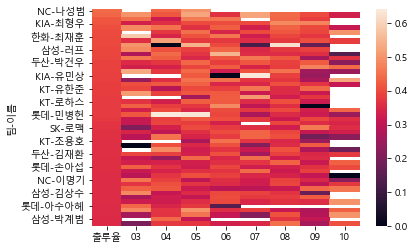

In [23]:
# 히트맵 작성

sns.heatmap(df_selected)

<AxesSubplot:ylabel='팀-이름'>

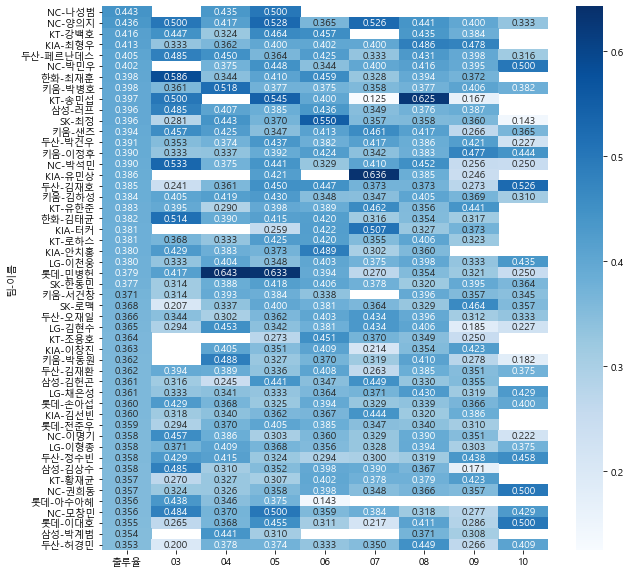

In [67]:
# 출루율을 히트맵으로 그리기
# 출루율 실적을 히트맵에 표현하고 , 컬러맵은 Reds를 활용하여 출루율이 높을 수록 진하게 !!
# 히트맵 크기 figsize, 실제값 기록은 annot

fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_selected, 
           annot = True, fmt = '.3f', 
           cmap = 'Blues')   # 소수점 3째 자리 까지

In [25]:
df_selected.columns[1:]  # 0부터 시작인데 1부터 시작하게 조절(슬라이싱)

Index(['출루율', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object')

In [29]:
# 월별 출루율을 시즌 출루율 대비한 +-값으로 변경하여, 월별 변화 정도를 살피기 
# 시즌 대비 월별 실적

for col in df_selected.columns[1:] : 
    df_selected[col] =  df_selected[col] - df_selected['출루율']
    
    
df_selected['출루율'] = 0.0

df_selected.head()

출루율        03        04        05        06        07        08  \
팀   이름                                                                       
NC  나성범    0.0       NaN -0.008614  0.056604       NaN       NaN       NaN   
    양의지    0.0  0.063715 -0.019618  0.091805 -0.071702  0.090031  0.004891   
KT  강백호    0.0  0.031527 -0.092032  0.048444  0.040680       NaN  0.019453   
KIA 최형우    0.0 -0.079279 -0.050910 -0.012613 -0.010551 -0.012613  0.073102   
두산  페르난데스  0.0  0.079361  0.044053 -0.041081  0.019291 -0.072154  0.025705   

                 09        10  
팀   이름                         
NC  나성범         NaN       NaN  
    양의지   -0.036285 -0.102952  
KT  강백호   -0.032280       NaN  
KIA 최형우    0.065648       NaN  
두산  페르난데스 -0.007897 -0.089698

<AxesSubplot:ylabel='팀-이름'>

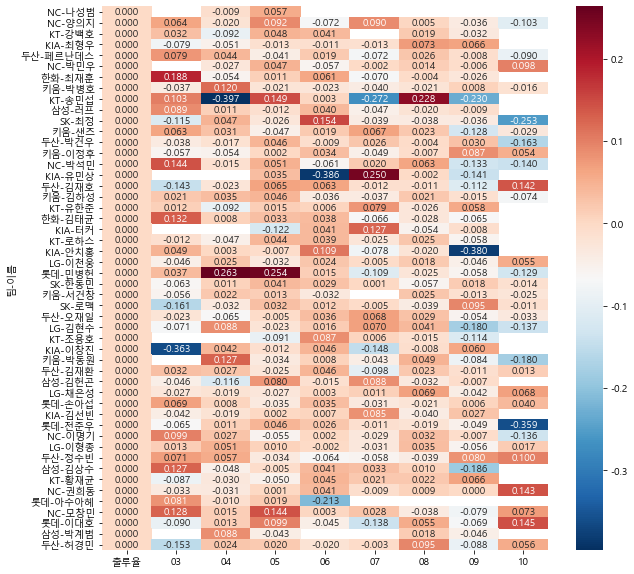

In [34]:
# 히트맵으로 표현
# 이번에는 컬러맵을 Blue~ Red 로 나타내기 위해서 RdBu_r
# 어디가 변화가 많은지 빨리 살펴볼 수 있음

fig, ax = plt.subplots(figsize =(10,10))
sns.heatmap( df_selected, annot = True, fmt = '.3f', cmap = 'RdBu_r')